In [8]:
! pip install inference

In [9]:
from inference_sdk import InferenceHTTPClient
from inference import get_model
import supervision as sv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [10]:
! pip install Roboflow

In [24]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)
# infer on a local image
result = CLIENT.infer("/Users/sarancibia/Downloads/Made in Abyss/Made in Abyss v01/CCF_0058.jpg", model_id="manga-text-detection/2")

In [25]:
result

{'time': 0.3279367979999961,
 'image': {'width': 1735, 'height': 2492},
 'predictions': [{'x': 1348.2109375,
   'y': 350.4375,
   'width': 131.4140625,
   'height': 345.5703125,
   'confidence': 0.9649763107299805,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '4e146768-d851-4076-8d98-653749e631b0'},
  {'x': 212.939453125,
   'y': 988.0390625,
   'width': 192.25390625,
   'height': 384.5078125,
   'confidence': 0.9630225896835327,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '035b9a67-0128-4348-aba5-1009479ad495'},
  {'x': 944.234375,
   'y': 1926.189453125,
   'width': 204.421875,
   'height': 425.87890625,
   'confidence': 0.9616188406944275,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': 'bb637913-db74-4f9b-aa77-0354d5f78071'},
  {'x': 894.345703125,
   'y': 459.94921875,
   'width': 221.45703125,
   'height': 433.1796875,
   'confidence': 0.9605541229248047,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': 'fa9dc0

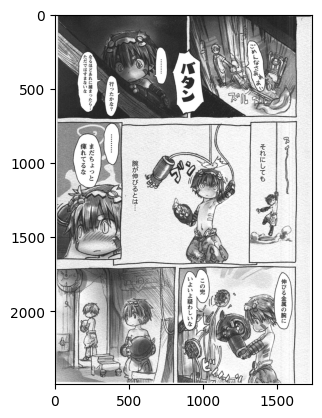

In [26]:
img = cv.imread("/Users/sarancibia/Downloads/Made in Abyss/Made in Abyss v01/CCF_0058.jpg")
img_trials = img.copy()

plt.imshow(img_trials)

In [51]:
img_pil = Image.fromarray(img_trials)
draw = ImageDraw.Draw(img_pil)

for prediction in result['predictions']:
    if prediction['class'] == 'text_bubble':
        x = round(prediction['x'])
        y = round(prediction['y'])
        width = round(prediction['width'])
        height = round(prediction['height'])

        margin_x = 25
        margin_y = 25
        x1 = round(x - width / 2) + margin_x
        y1 = round(y - height / 2) + margin_y
        x2 = round(x + width / 2) - margin_x
        y2 = round(y + height / 2) - margin_y

        draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=90)
        #img_covered = cv.rectangle(img_trials, (x1,y1),(x2,y2),(255,255,255),-1)

img_pil.save('imagen_prueba.png')

In [53]:
img_pil.width

1734

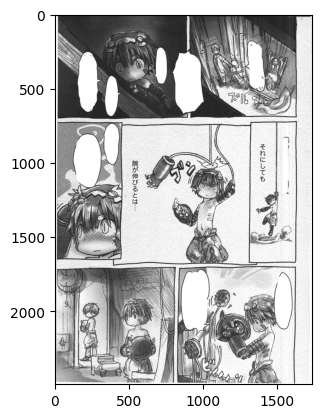

In [52]:
plt.imshow(img_pil)